<a href="https://colab.research.google.com/github/mahhhdy/SBU_DataMining_Python/blob/main/exercise3_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   initial libs and check for missing values
*   Visualizing bitcoin data
*   reverse ordering by date of dataFrame rows and reset index
*   convert date column format
*   split data set to train and test
*   test models



# initial libs and check for missing values

In [163]:
import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import math

plt.style.use('seaborn-darkgrid')
drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/BitcoinHistoricalDataInvesting.csv'

df=pd.read_csv(path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           Date   Price    Open    High     Low     Vol. Change %
0  Jan 01, 2020  7199.8  7196.4  7259.4  7180.0  420.28K    0.05%
1  Dec 31, 2019  7196.4  7261.5  7331.0  7167.4  586.60K   -0.90%
2  Dec 30, 2019  7261.8  7397.5  7420.9  7244.1  606.11K   -1.84%
3  Dec 29, 2019  7397.5  7321.6  7518.9  7303.0  611.69K    1.04%
4  Dec 28, 2019  7321.5  7261.9  7375.9  7256.5  610.96K    0.82%


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3455 non-null   object 
 1   Price     3455 non-null   float64
 2   Open      3455 non-null   float64
 3   High      3455 non-null   float64
 4   Low       3455 non-null   float64
 5   Vol.      3455 non-null   object 
 6   Change %  3455 non-null   object 
dtypes: float64(4), object(3)
memory usage: 189.1+ KB


Price feature is Close value of candel

In [165]:
df.isnull().any()

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

# reverse ordering of dataFrame rows and reset index

In [166]:
df = df[::-1].reset_index(drop = True) 

# Visualizing bitcoin data

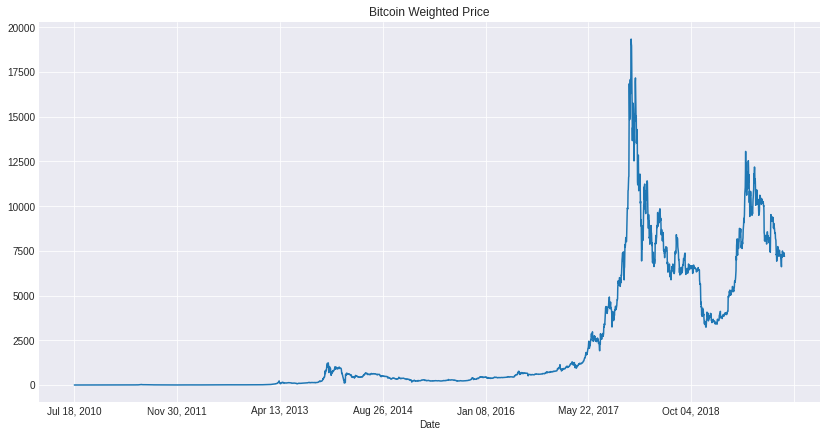

In [167]:
df.set_index("Date").Price.plot(figsize=(14,7), title="Bitcoin Weighted Price")

# convert date column format

In [168]:
df['Date']= df['Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d'))

In [169]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%
1,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
2,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
3,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%


nake copy from data fram

In [170]:
df_copy = df.copy()

# split data set to train and test

In [171]:
df.index[df['Date'] == '2020-01-01'].tolist()

[3454]

In [172]:
print(df.shape)
n = df.shape[0] - 486
print(n)

(3455, 7)
2969


In [173]:
X = df.drop(['Date','Price','Vol.','Change %'],axis=1)
Y = df['Price']


X_train = X[0:2969]
X_test = X[2969:]
y_train = Y[0:2969]
y_test = Y[2969:]

In [174]:
X_test.size

1458

# Test Models

In [175]:
lin_regression = LinearRegression().fit(X_train, y_train)
lin_pred = lin_regression.predict(X_test)
lin_pred_score = math.sqrt(mean_squared_error(y_test, lin_pred))
print('test score LinearRegression : %.2f RMSE' % (lin_pred_score))

test score LinearRegression : 125.81 RMSE


In [176]:
ridge = Ridge().fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_pred_score = math.sqrt(mean_squared_error(y_test, ridge_pred))
print('test score Ridge : %.2f RMSE' % (ridge_pred_score))

test score Ridge : 125.81 RMSE


In [177]:
lasso = Lasso().fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_pred_score = math.sqrt(mean_squared_error(y_test, lasso_pred))
print('test score Lasso : %.2f RMSE' % (lasso_pred_score))

test score Lasso : 134.77 RMSE


In [178]:
svr_poly = SVR(kernel='poly').fit(X_train,y_train)
svr_poly_pred = svr_poly.predict(X_test)
svr_poly_pred_score = math.sqrt(mean_squared_error(y_test, svr_poly_pred))
print('test score SVR with poly kernel: %.2f RMSE' % (svr_poly_pred_score))

test score SVR with poly kernel: 3449.76 RMSE


In [179]:
svr_rbf = SVR(kernel='rbf', gamma=0.1).fit(X_train, y_train)
svr_rbf_pred = svr_rbf.predict(X_test)
svr_rbf_pred_score = math.sqrt(mean_squared_error(y_test, svr_rbf_pred))
print('test score SVR with rbf kernel: %.2f RMSE' % (svr_rbf_pred_score))

test score SVR with rbf kernel: 7091.44 RMSE


In [180]:
print('%.2f ' % (lin_pred_score),'test score LinearRegression')
print('%.2f ' % (ridge_pred_score),'test score Ridge')
print('%.2f ' % (lasso_pred_score),'test score Lasso')
print('%.2f ' % (svr_poly_pred_score),'test score SVR with poly kernel')
print('%.2f ' % (svr_rbf_pred_score),'test score SVR with rbf kernel')

125.81  test score LinearRegression
125.81  test score Ridge
134.77  test score Lasso
3449.76  test score SVR with poly kernel
7091.44  test score SVR with rbf kernel
